In [1]:
from pathlib import Path
import rasterio
import numpy as np
from matplotlib import pyplot as plt

In [8]:
YIELDS_DIR = Path('data/yields')
CROP = 'WHE'
NO_DATA = -999

In [9]:
# Get list of yield fiels starting with 'soybean'
yield_files = list(YIELDS_DIR.glob(f'{CROP}*.tif'))
num_files = len(yield_files)
num_files

76

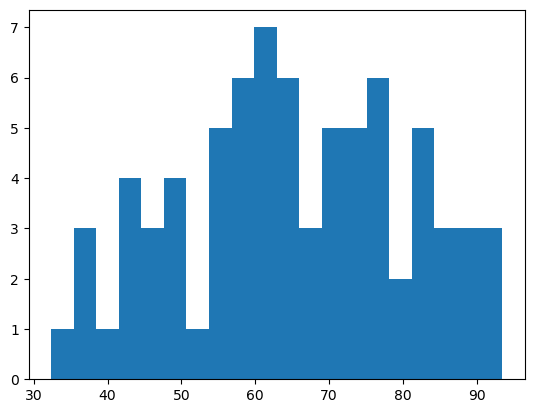

In [10]:
field_averages = []
field_sizes = []
for yield_file in yield_files:
    with rasterio.open(yield_file) as src:
        data = src.read(1)
        data[data == NO_DATA] = np.nan
        field_averages.append(np.nanmean(data))
        field_sizes.append(np.count_nonzero(~np.isnan(data)))

plt.hist(field_averages, bins=20)
plt.show()

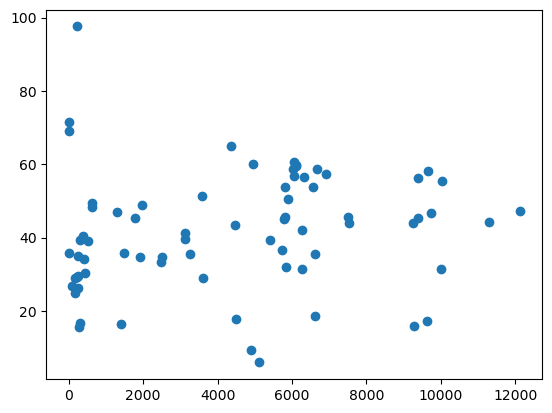

In [14]:
plt.scatter(field_sizes, field_averages)
plt.show()

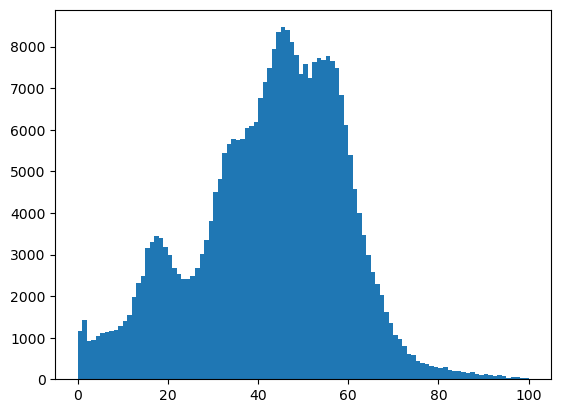

In [15]:
pixel_values = []
for yield_file in yield_files:
    with rasterio.open(yield_file) as src:
        data = src.read(1)
        data[data == NO_DATA] = np.nan
        pixel_values.extend(data.flatten())

plt.hist(pixel_values, bins=100, range=(0, 100))
plt.show()

In [16]:
overall_mean = np.nanmean(pixel_values)
overall_median = np.nanmedian(pixel_values)
overall_std = np.nanstd(pixel_values)

overall_mean, overall_median, overall_std

(np.float64(43.17737896417466),
 np.float64(44.62624954397408),
 np.float64(35.51292364131173))

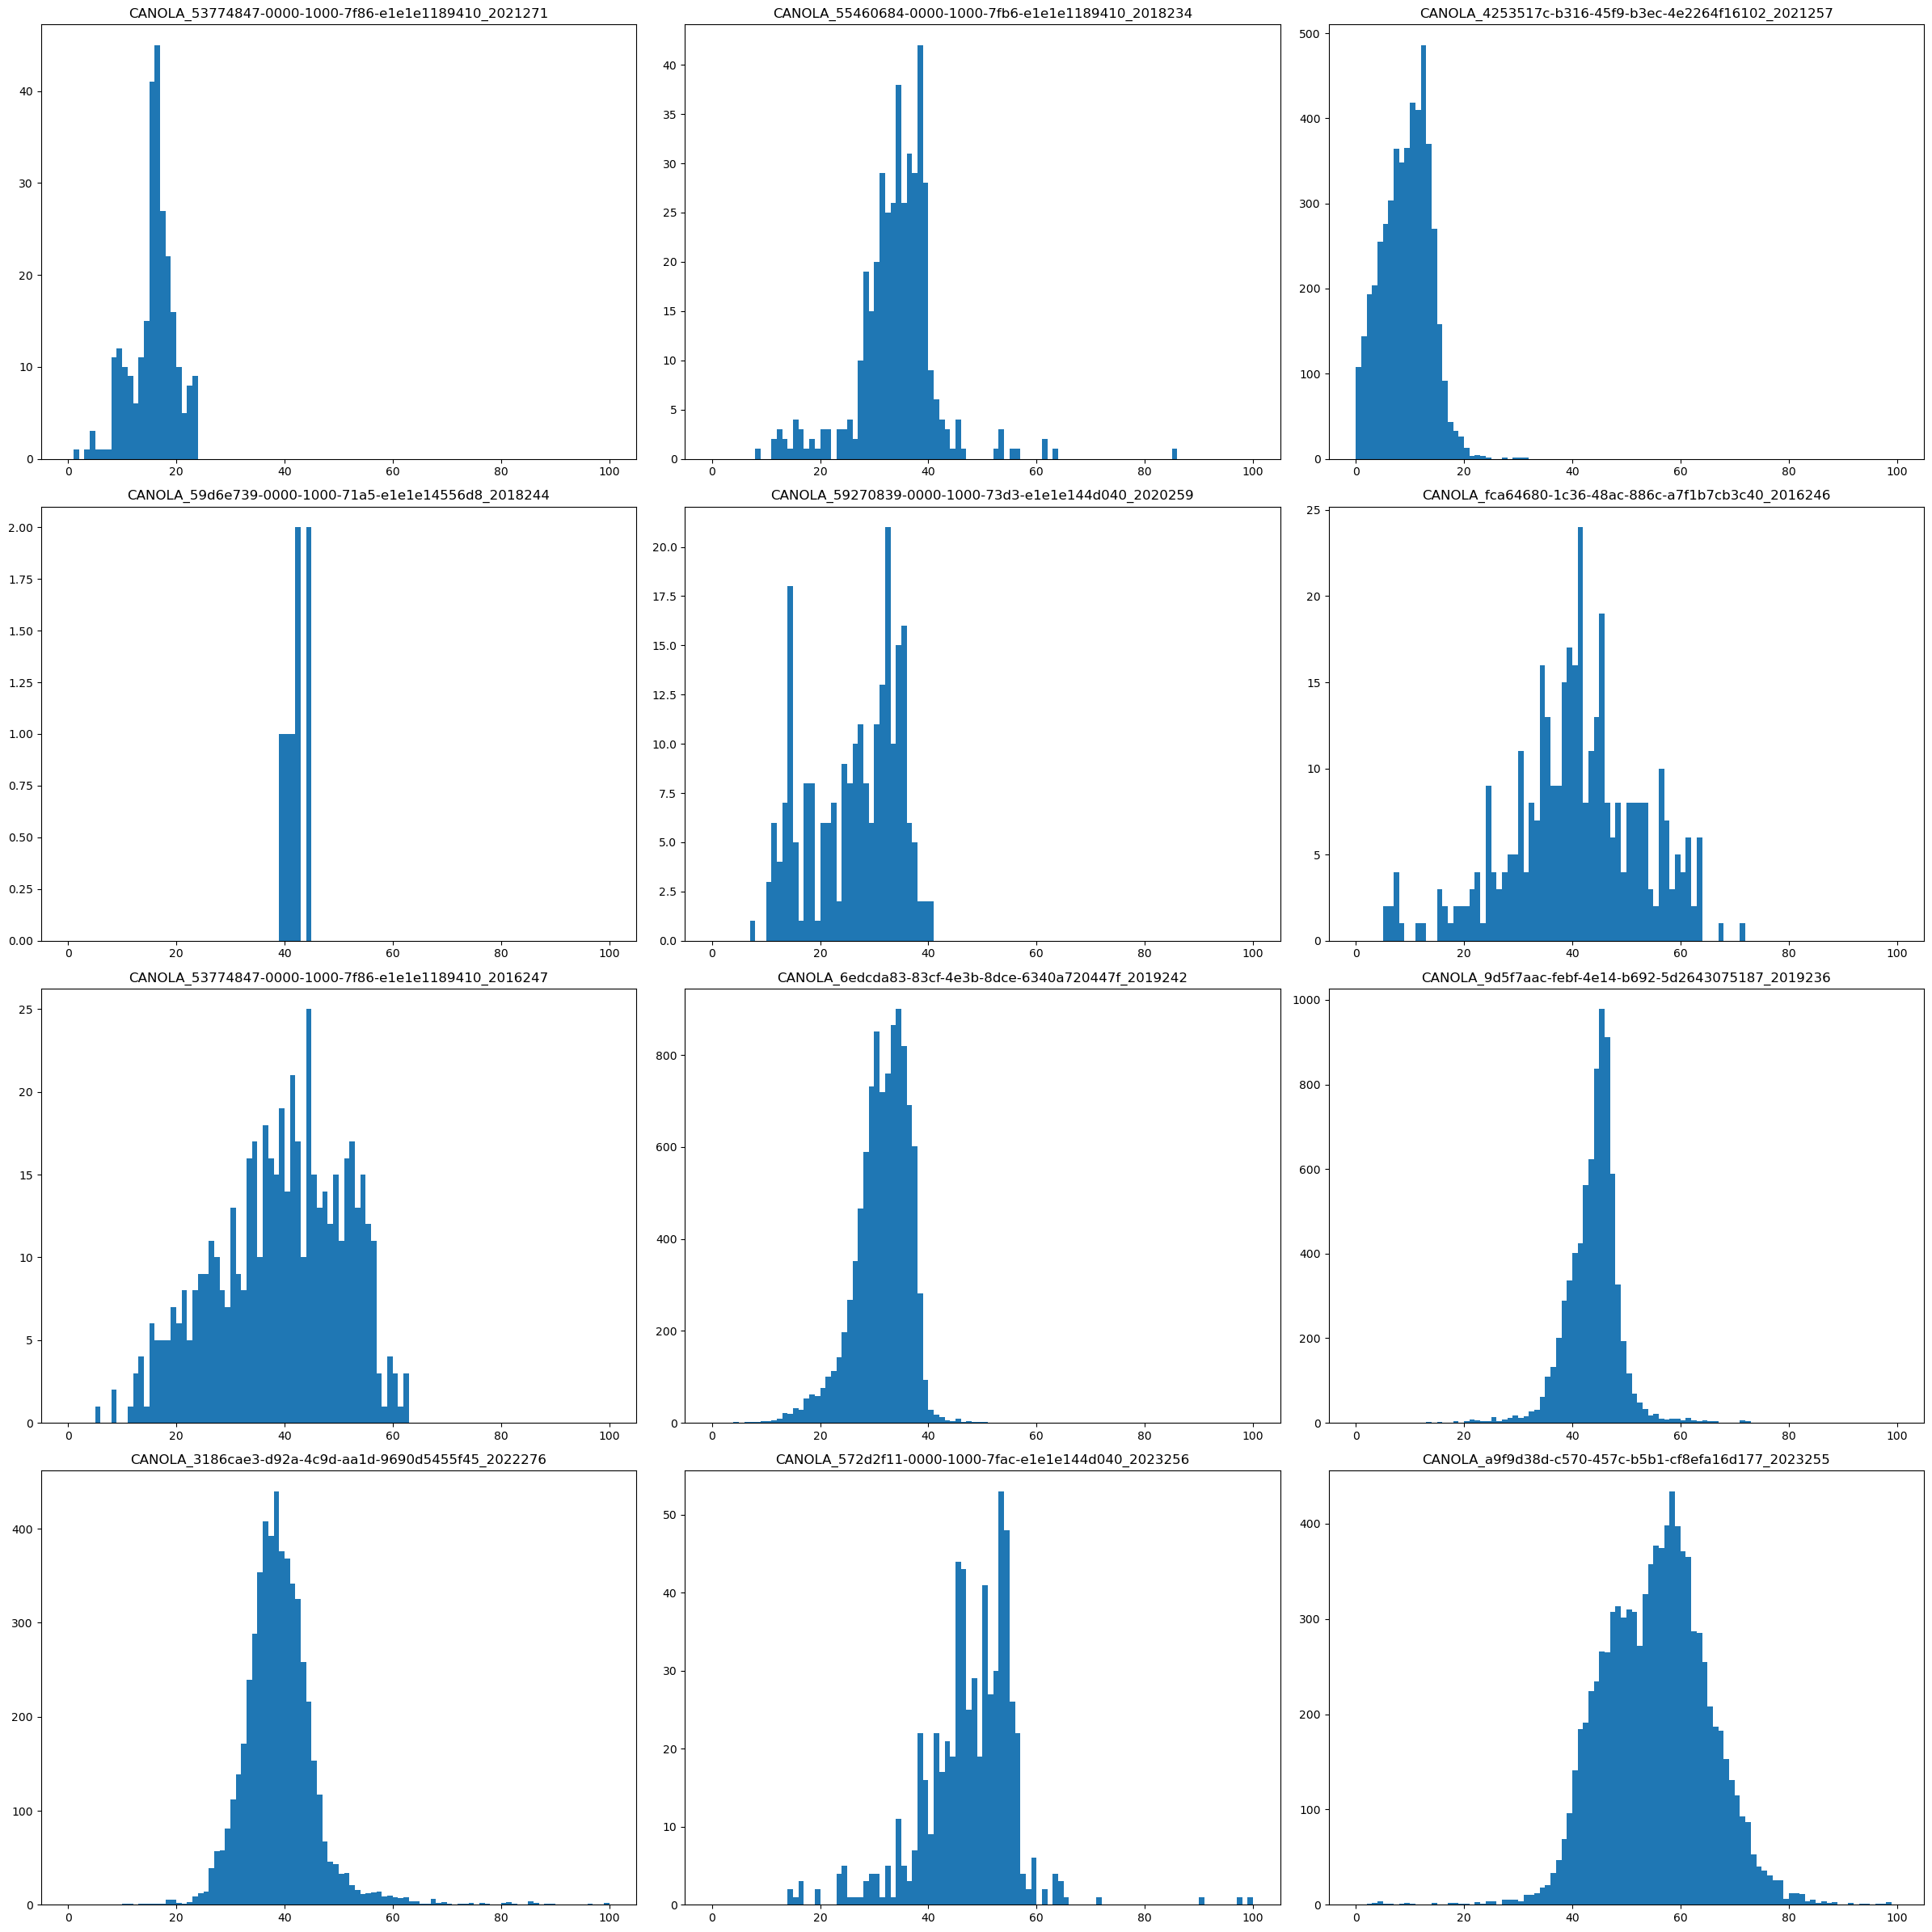

In [18]:
import random

# Select 12 random yield files
random_files = random.sample(yield_files, 12)
num_files = len(random_files)
num_cols = 3
num_rows = (num_files + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 24))
axs = axs.flatten()  # Flatten the array to make indexing easier

for i, yield_file in enumerate(random_files):
    with rasterio.open(yield_file) as src:
        data = src.read(1)
        data[data == NO_DATA] = np.nan
        ax = axs[i]
        ax.hist(data.flatten(), bins=100, range=(0, 100))
        ax.set_title(yield_file.stem)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()